In [2]:
import pandas as pd
import chess
import chess.engine
with open("../data/raw/march.txt") as file:
    data = file.read()
with open("../data/raw/february.txt") as file:
    data2 = file.read()    
# pd.read_csv()

In [3]:
games = []

all_data = data.split("""\\n[Round \\"-\\"]""") + data2.split("""\\n[Round \\"-\\"]""")
nash_is_white = False
url = "https://www.chess.com/live/game/4591331591"
for moves0 in all_data:
    try:
        if "nash" in moves0:
            moves1 = moves0.split("""\\"]\\n\\n1.""")[1]
            # moves1.replace("{[%clk \d*:29:56.6]}")
            import re
            moves2 = re.sub(" \{\[%clk \d*:\d*:\d*(\.\d)?\]\}", "", moves1)
            moves3 = re.sub("\d*\.(\.\.)?", "", moves2)
            moves4 = moves3.split('"')[0].strip()
            moves5 = moves4.split("  ")
            games.append((nash_is_white, url, [x.split(" ")[0] for x in moves5]))
            nash_is_white = """White \\"nash""" in moves0
            url = re.match(""".*(https://www.chess.com/live/game/\d*).*""", moves0).group(1)
    except:
        pass


In [4]:
len(games)

37

In [5]:
games

[(False,
  'https://www.chess.com/live/game/4591331591',
  ['d4',
   'd5',
   'Nc3',
   'Nf6',
   'Nf3',
   'Nc6',
   'g4',
   'Bxg4',
   'Bg2',
   'e6',
   'h3',
   'Bxf3',
   'Bxf3',
   'Bb4',
   'a3',
   'Bxc3+',
   'bxc3',
   'Na5',
   'Rb1',
   'b6',
   'e3',
   'Nc4',
   'Ra1',
   'c5',
   'Rg1',
   'O-O',
   'Kf1',
   'Ne4',
   'Rg2',
   'Qh4',
   'Rg4',
   'Qxh3+',
   'Kg1',
   'Nxc3',
   'Qd2',
   'Ne4',
   'c3',
   'Nexd2']),
 (True,
  'https://www.chess.com/live/game/4591439188',
  ['e4',
   'Nf6',
   'e5',
   'Nd5',
   'c4',
   'Nb6',
   'd4',
   'd6',
   'exd6',
   'cxd6',
   'Nf3',
   'Bf5',
   'Nc3',
   'e6',
   'b3',
   'd5',
   'Bg5',
   'f6',
   'Bh4',
   'Bb4',
   'Rc1',
   'Nc6',
   'c5',
   'Nd7',
   'Bb5',
   'Bxc3+',
   'Rxc3',
   'Qa5',
   'Bxc6',
   'Qxc3+',
   'Qd2',
   'Qa1+',
   'Qd1',
   'Qxd1+',
   'Kxd1',
   'bxc6',
   'Rg1',
   'Bg4',
   'Kd2',
   'Bxf3',
   'gxf3',
   'O-O',
   'a3',
   'e5',
   'Kd3',
   'exd4',
   'Kxd4',
   'Ne5',
   'Ke3',
   'Rab8'

Now to use the data

In [6]:
def piece_moved_given_move(move):
    answer = None
    if move.startswith("N"):
        answer = "N"
    elif move.startswith("Q"):
        answer = "Q"
    elif move.startswith("K"):
        answer = "K"
    elif move.startswith("O"):
        answer = "C"
    elif move.startswith("R"):
        answer = "R"
    elif move.startswith("B"):
        answer = "B"
    else:
        answer = "P"
    return answer
        
m = {"a": 0, "b": 1, "c": 2, "d": 3, "e": 4, "f": 5, "g": 6, "h": 7}
m2 = {"1": 0, "2": 8, "3": 16, "4": 24, "5": 32, "6": 40, "7": 48, "8": 56}
def get_symbol_of_uci_move_piece(uci_move):
    letter = uci_move[0:1]
    number = uci_move[1:2]
    location = m[letter] + m2[number]
    symbol = board.piece_at(location).symbol().upper()
    return "C" if symbol == "K" and uci_move[0:1].upper() == "E" and uci_move[2:3].upper() in ["G","A","B","C"] else symbol

In [7]:
engine = chess.engine.SimpleEngine.popen_uci("../models/stockfish-11-mac/Mac/stockfish-11-64")
engine.id.get("name")
#

'Stockfish 11 64'

In [ ]:
ms = 20000

rows = []

game_number = 1
for game in games:    
    print(game_number)
    board = chess.Board()
    moves = game[2]
    moves
    nash_is_white = game[0]
    player = "nash" if nash_is_white else "peter"
    color = "white"
    move_number = 1
    for move in moves:
        row = {}
        piece_moved = piece_moved_given_move(move)
        result = engine.play(board, chess.engine.Limit(time=ms/1000))
        string_of_best_move = str(result.move)
        piece_of_best_move = get_symbol_of_uci_move_piece(string_of_best_move)
        row['game_number'] = game_number
        row['move_number'] = int(move_number)
        row['color'] = color
        row['correct'] = piece_of_best_move.upper()
        row['choice'] = piece_moved.upper()
        row['player'] = player
        player = "nash" if player == "peter" else "peter"
        color = "white" if color == "black" else "black"
        move_number = move_number + 0.5001
        # board.push_uci()
        board.push_san(move)
        rows.append(row)
    game_number += 1
df = pd.DataFrame(rows)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [ ]:
# df.to_csv("../data/interim/df_100ms.csv", index=False)
df.to_csv("../data/interim/df_{}ms.csv".format(ms), index=False)

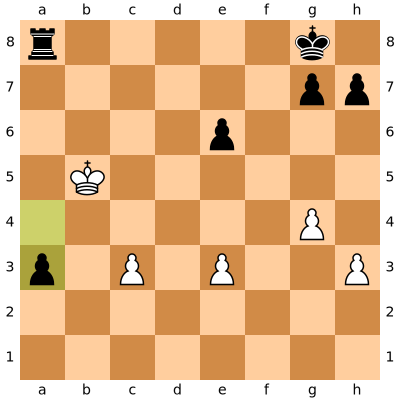

In [23]:
board